In [120]:
# imports
import pandas as pd
import numpy as np
from scipy import stats
from env import host, user, password
import acquire
import prepare
# imports specific to prepare
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# use my functions to acquire telco_churn 
df = acquire.get_telco_data()

In [3]:
# let's see the value counts...
col_list = df.columns

In [4]:
col_list

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [5]:
# let's look at all columns value_counts
for col in col_list:
    print(col)
    print(df[col].value_counts())
    print('--------------------------------')

payment_type_id
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
--------------------------------
internet_service_type_id
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
--------------------------------
contract_type_id
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
--------------------------------
customer_id
9477-LGWQI    1
5671-RQRLP    1
6352-TWCAU    1
6158-HDPXZ    1
6480-YAGIY    1
             ..
0666-UXTJO    1
1236-WFCDV    1
7228-PAQPD    1
4929-ROART    1
1301-LOPVR    1
Name: customer_id, Length: 7043, dtype: int64
--------------------------------
gender
Male      3555
Female    3488
Name: gender, dtype: int64
--------------------------------
senior_citizen
0    5901
1    1142
Name: senior_citizen, dtype: int64
--------------------------------
partner
No     3641
Yes    3402
Name: partner, dtype: int64
--------------------------------
dependents
No     4933
Yes    2110
Name: dependents, dtype: int64

In [6]:
# let's see what we're working with...
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [7]:
df['customer_id'].nunique()

7043

In [8]:
# reset the customer_id to be the index
df = df.set_index('customer_id')

In [9]:
df.index

Index(['0016-QLJIS', '0017-DINOC', '0019-GFNTW', '0056-EPFBG', '0078-XZMHT',
       '0114-IGABW', '0123-CRBRT', '0191-EQUUH', '0214-JHPFW', '0229-LFJAF',
       ...
       '9837-FWLCH', '9860-LISIZ', '9867-NNXLC', '9929-PLVPA', '9932-WBWIK',
       '9962-BFPDU', '9967-ATRFS', '9970-QBCDA', '9975-SKRNR', '9986-BONCE'],
      dtype='object', name='customer_id', length=7043)

In [10]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
customer_id,,,,,,,,,,,,,,,,,,,,,
0016-QLJIS,2,1,3,Female,0,Yes,Yes,65,Yes,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
0017-DINOC,4,1,3,Male,0,No,No,54,No,No phone service,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
0019-GFNTW,3,1,3,Female,0,No,No,56,No,No phone service,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
0056-EPFBG,4,1,3,Male,0,Yes,Yes,20,No,No phone service,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
0078-XZMHT,3,1,3,Male,0,Yes,No,72,Yes,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [11]:
df.index.nunique()

7043

In [12]:
# are there any null values / whitespace?
# This replaces empty cells with nan (null values)
df = df.replace(' ', np.nan)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   gender                    7043 non-null   object 
 4   senior_citizen            7043 non-null   int64  
 5   partner                   7043 non-null   object 
 6   dependents                7043 non-null   object 
 7   tenure                    7043 non-null   int64  
 8   phone_service             7043 non-null   object 
 9   multiple_lines            7043 non-null   object 
 10  online_security           7043 non-null   object 
 11  online_backup             7043 non-null   object 
 12  device_protection         7043 non-null   object 
 13  tech_support              7043 non-null   object 
 14

In [14]:
# drop the nulls...
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7032 non-null   int64  
 1   internet_service_type_id  7032 non-null   int64  
 2   contract_type_id          7032 non-null   int64  
 3   gender                    7032 non-null   object 
 4   senior_citizen            7032 non-null   int64  
 5   partner                   7032 non-null   object 
 6   dependents                7032 non-null   object 
 7   tenure                    7032 non-null   int64  
 8   phone_service             7032 non-null   object 
 9   multiple_lines            7032 non-null   object 
 10  online_security           7032 non-null   object 
 11  online_backup             7032 non-null   object 
 12  device_protection         7032 non-null   object 
 13  tech_support              7032 non-null   object 
 14

In [15]:
# convert payment types to 1:auto-pay, 0:not auto-pay
df['auto_pay'] = df['payment_type_id'].replace({1:0, 2:0, 3:1, 4:1})

In [16]:
# create DSL column where 1:has DSL, 0:No DSL
df['dsl'] = df['internet_service_type_id'].replace({1:1, 2:0, 3:0})

In [17]:
# create Fiber column where 1:has Fiber service, 0:No Fiber
df['fiber'] = df['internet_service_type_id'].replace({1:0, 2:1, 3:0})

In [18]:
# create Has Internet column where 1:Has Internet 0:No internet service
df['has_internet'] = df['internet_service_type_id'].replace({1:1, 2:1, 3:0})

In [19]:
# separte contract_type_id into three columns...
# create m2m column where 1:Month-to-Month service, 2:contract
df['m2m'] = df['contract_type_id'].replace({1:1, 2:0, 3:0})

In [20]:
# create one_year column where 1:One year contract, 0:no contract, or m2m
df['one_year'] = df['contract_type_id'].replace({1:0, 2:1, 3:0})

In [21]:
# create teo_year column where 1:two year contract, 0:less than 2 year contract
df['two_year'] = df['contract_type_id'].replace({1:0, 2:0, 3:1})

In [22]:
# create has contract column where 1:has contract, 0:no contract
df['has_contract'] = df['contract_type_id'].replace({1:0, 2:1, 3:1})

In [23]:
# create column to convert gender to int 1:male, 0:female
df['is_male'] = df['gender'].replace({'Male':1, 'Female':0})

In [24]:
# create reusable dictionary for replacing 'No', 'Yes', 'No internet service', 'No phone service'
rep_dict = {
    'No': 0,
    'Yes': 1,
    'No internet service': 0,
    'No phone service': 0
}

In [25]:
# create has_partner column where 1:has partner, 0:no partner
df['has_partner'] = df['partner'].replace(rep_dict)

In [26]:
# create has_dep column where 1:has dependents, 0:no dependents
df['has_dep'] = df['dependents'].replace(rep_dict)

In [27]:
# better identify tenure in months by renaming column...
df['tenure_months'] = df['tenure']

In [28]:
# create has_phone column where 1:has phone, 0:no phone
df['has_phone'] = df['phone_service'].replace(rep_dict)

In [29]:
# create multi_phone column where 1:multiple phone lines, 0:One or fewer phone lines
df['multi_phone'] = df['multiple_lines'].replace(rep_dict)

In [30]:
# create security column where 1:has online security, 2:no security
df['has_security'] = df['online_security'].replace(rep_dict)

In [31]:
# create has_backup column where 1:has online backup, 0:no backup
df['has_backup'] = df['online_backup'].replace(rep_dict)

In [32]:
# create has_protection column where 1:has device protection, 0:no device protection
df['has_protection'] = df['device_protection'].replace(rep_dict)

In [33]:
# create has_support column where 1:has tech support, 0:no tech support
df['has_support'] = df['tech_support'].replace(rep_dict)

In [34]:
# create stream_tv column where 1:streams tv, 0:no streaming tv
df['stream_tv'] = df['streaming_tv'].replace(rep_dict)

In [35]:
# create stream_movies column where 1:streams movies, 0:no streaming movies
df['stream_movies'] = df['streaming_movies'].replace(rep_dict)

In [36]:
# create has_paperless column where 1:has paperless billing, 0:no paperless billing
df['has_paperless'] = df['paperless_billing'].replace(rep_dict)

In [37]:
# convert total_charges to float
df['total_charges'] = df['total_charges'].astype(float)

In [38]:
# create has_churn column where 1:has churn, 0:no churn
df['has_churn'] = df['churn'].replace(rep_dict)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7032 non-null   int64  
 1   internet_service_type_id  7032 non-null   int64  
 2   contract_type_id          7032 non-null   int64  
 3   gender                    7032 non-null   object 
 4   senior_citizen            7032 non-null   int64  
 5   partner                   7032 non-null   object 
 6   dependents                7032 non-null   object 
 7   tenure                    7032 non-null   int64  
 8   phone_service             7032 non-null   object 
 9   multiple_lines            7032 non-null   object 
 10  online_security           7032 non-null   object 
 11  online_backup             7032 non-null   object 
 12  device_protection         7032 non-null   object 
 13  tech_support              7032 non-null   object 
 14

In [40]:
# now I have my wide DataFrame, let's prep round 2

In [41]:
# I want to make sure I keep all columns in this df, but I want to eliminate
# some for me to work with. That way, if I need a visual check, I can look back, but
# I want have as much out of my way as possible for me to work with

In [42]:
# let's get a list of columns to drop
list(df.select_dtypes('object').columns)

['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [43]:
# all object columns in a variable to drop
obj_cols = list(df.select_dtypes('object').columns)

In [44]:
# other columns to drop...
other_drops = ['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'tenure']

In [45]:
# combine all drops into 1 list
all_drops = obj_cols + other_drops

In [46]:
# return a new, clean dataframe
df_1 = df.drop(columns=all_drops)

In [47]:
# what's it look like?
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   senior_citizen   7032 non-null   int64  
 1   monthly_charges  7032 non-null   float64
 2   total_charges    7032 non-null   float64
 3   auto_pay         7032 non-null   int64  
 4   dsl              7032 non-null   int64  
 5   fiber            7032 non-null   int64  
 6   has_internet     7032 non-null   int64  
 7   m2m              7032 non-null   int64  
 8   one_year         7032 non-null   int64  
 9   two_year         7032 non-null   int64  
 10  has_contract     7032 non-null   int64  
 11  is_male          7032 non-null   int64  
 12  has_partner      7032 non-null   int64  
 13  has_dep          7032 non-null   int64  
 14  tenure_months    7032 non-null   int64  
 15  has_phone        7032 non-null   int64  
 16  multi_phone      7032 non-null   int64  
 17  has_

In [48]:
df_1.nunique()

senior_citizen        2
monthly_charges    1584
total_charges      6530
auto_pay              2
dsl                   2
fiber                 2
has_internet          2
m2m                   2
one_year              2
two_year              2
has_contract          2
is_male               2
has_partner           2
has_dep               2
tenure_months        72
has_phone             2
multi_phone           2
has_security          2
has_backup            2
has_protection        2
has_support           2
stream_tv             2
stream_movies         2
has_paperless         2
has_churn             2
dtype: int64

In [49]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on has_churn.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=1221, stratify=df.has_churn)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=1221, 
                                       stratify=train_validate.has_churn)
    return train, validate, test

In [50]:
train, validate, test = split_data(df_1)

In [51]:
# what do each of my new splits look like?
train.shape, validate.shape, test.shape

((3937, 25), (1688, 25), (1407, 25))

In [52]:
# ok, I should be good to move on to exploration

In [53]:
# first, I'm going to look at my training data set
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3937 entries, 3976-HXHCE to 9606-PBKBQ
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   senior_citizen   3937 non-null   int64  
 1   monthly_charges  3937 non-null   float64
 2   total_charges    3937 non-null   float64
 3   auto_pay         3937 non-null   int64  
 4   dsl              3937 non-null   int64  
 5   fiber            3937 non-null   int64  
 6   has_internet     3937 non-null   int64  
 7   m2m              3937 non-null   int64  
 8   one_year         3937 non-null   int64  
 9   two_year         3937 non-null   int64  
 10  has_contract     3937 non-null   int64  
 11  is_male          3937 non-null   int64  
 12  has_partner      3937 non-null   int64  
 13  has_dep          3937 non-null   int64  
 14  tenure_months    3937 non-null   int64  
 15  has_phone        3937 non-null   int64  
 16  multi_phone      3937 non-null   int64  
 17  has_

In [54]:
# looking at categorical vs continuous variables
train.nunique()

senior_citizen        2
monthly_charges    1333
total_charges      3743
auto_pay              2
dsl                   2
fiber                 2
has_internet          2
m2m                   2
one_year              2
two_year              2
has_contract          2
is_male               2
has_partner           2
has_dep               2
tenure_months        72
has_phone             2
multi_phone           2
has_security          2
has_backup            2
has_protection        2
has_support           2
stream_tv             2
stream_movies         2
has_paperless         2
has_churn             2
dtype: int64

In [55]:
# what about the math
train.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,3937.0,0.169418,0.375169,0.00,0.0,0.00,0.0,1.00
monthly_charges,3937.0,64.487071,29.887050,18.25,35.5,70.15,89.7,118.35
total_charges,3937.0,2267.968606,2251.870938,18.80,397.0,1388.45,3810.8,8684.80
auto_pay,3937.0,0.433579,0.495632,0.00,0.0,0.00,1.0,1.00
dsl,3937.0,0.347473,0.476228,0.00,0.0,0.00,1.0,1.00
fiber,3937.0,0.434341,0.495733,0.00,0.0,0.00,1.0,1.00
has_internet,3937.0,0.781814,0.413067,0.00,1.0,1.00,1.0,1.00
m2m,3937.0,0.552451,0.497304,0.00,0.0,1.00,1.0,1.00
one_year,3937.0,0.211328,0.408303,0.00,0.0,0.00,0.0,1.00
two_year,3937.0,0.236220,0.424813,0.00,0.0,0.00,0.0,1.00


In [56]:
train.columns

Index(['senior_citizen', 'monthly_charges', 'total_charges', 'auto_pay', 'dsl',
       'fiber', 'has_internet', 'm2m', 'one_year', 'two_year', 'has_contract',
       'is_male', 'has_partner', 'has_dep', 'tenure_months', 'has_phone',
       'multi_phone', 'has_security', 'has_backup', 'has_protection',
       'has_support', 'stream_tv', 'stream_movies', 'has_paperless',
       'has_churn'],
      dtype='object')

In [77]:
# let's get a list of categorical variables...
cat_vars = ['senior_citizen', 'auto_pay', 'dsl', 'fiber', 'has_internet', 'm2m', 'one_year',
       'two_year', 'has_contract', 'is_male', 'has_partner', 'has_dep', 'has_phone', 'multi_phone', 'has_security',
       'has_backup', 'has_protection', 'has_support', 'stream_tv',
       'stream_movies', 'has_paperless']

In [78]:
quant_vars = ['monthly_charges', 'total_charges', 'tenure_months']

In [79]:
# can I make a function to look at chi^2 for all categorical variables against has_churn?
for cat in cat_vars:
    print(cat)
    observed = pd.crosstab(train['has_churn'], train[cat])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    print(f'chi^2 = {chi2:.4f}')
    print(f'p     = {p:.4f}')
    print('--------------------------------')

senior_citizen
chi^2 = 114.5890
p     = 0.0000
--------------------------------
auto_pay
chi^2 = 164.2553
p     = 0.0000
--------------------------------
dsl
chi^2 = 63.2535
p     = 0.0000
--------------------------------
fiber
chi^2 = 398.3547
p     = 0.0000
--------------------------------
has_internet
chi^2 = 217.2718
p     = 0.0000
--------------------------------
m2m
chi^2 = 632.7017
p     = 0.0000
--------------------------------
one_year
chi^2 = 131.1002
p     = 0.0000
--------------------------------
two_year
chi^2 = 338.5036
p     = 0.0000
--------------------------------
has_contract
chi^2 = 632.7017
p     = 0.0000
--------------------------------
is_male
chi^2 = 1.9712
p     = 0.1603
--------------------------------
has_partner
chi^2 = 68.2426
p     = 0.0000
--------------------------------
has_dep
chi^2 = 89.8354
p     = 0.0000
--------------------------------
has_phone
chi^2 = 0.0721
p     = 0.7884
--------------------------------
multi_phone
chi^2 = 5.4421
p     = 0.0197


In [105]:
# can I make a function to look at chi^2 for all categorical variables against has_churn?
def telco_cat_chi(df):
    for cat in cat_vars:
        print(cat)
        observed = pd.crosstab(train['has_churn'], train[cat])
        chi2, p, degf, expected = stats.chi2_contingency(observed)
        print(f'chi^2 = {chi2:.4f}')
        print(f'p     = {p:.4f}')
        print('--------------------------------')

In [106]:
telco_cat_chi(train)

senior_citizen
chi^2 = 114.5890
p     = 0.0000
--------------------------------
auto_pay
chi^2 = 164.2553
p     = 0.0000
--------------------------------
dsl
chi^2 = 63.2535
p     = 0.0000
--------------------------------
fiber
chi^2 = 398.3547
p     = 0.0000
--------------------------------
has_internet
chi^2 = 217.2718
p     = 0.0000
--------------------------------
m2m
chi^2 = 632.7017
p     = 0.0000
--------------------------------
one_year
chi^2 = 131.1002
p     = 0.0000
--------------------------------
two_year
chi^2 = 338.5036
p     = 0.0000
--------------------------------
has_contract
chi^2 = 632.7017
p     = 0.0000
--------------------------------
is_male
chi^2 = 1.9712
p     = 0.1603
--------------------------------
has_partner
chi^2 = 68.2426
p     = 0.0000
--------------------------------
has_dep
chi^2 = 89.8354
p     = 0.0000
--------------------------------
has_phone
chi^2 = 0.0721
p     = 0.7884
--------------------------------
multi_phone
chi^2 = 5.4421
p     = 0.0197


In [110]:
# now let's do ttests of continuous variables against has_churn
def telco_quant_ttest(df):
    for quant in quant_vars:
        churn_rate = df['has_churn'].mean()
        alpha = 0.01
        t, p = stats.ttest_1samp(df[quant], churn_rate)
        print(quant)
        print('tscore:', t.round(2))
        print('p/2:   ', p/2)
        print('alpha: ', alpha)
        print('-------------------------------------')

In [111]:
telco_quant_ttest(train)

monthly_charges
tscore: 134.83
p/2:    0.0
alpha:  0.01
-------------------------------------
total_charges
tscore: 63.19
p/2:    0.0
alpha:  0.01
-------------------------------------
tenure_months
tscore: 81.78
p/2:    0.0
alpha:  0.01
-------------------------------------


In [133]:
# let's visualize some of this

def telco_melt(df):
    '''
    This function will take in the cleaned/prepped/split telco_train and return a melted
    dataframe of all numerical/continuous variables
    '''
#     melts the data into 3 cols (has_churn, measurement, value)
# has_churn=[1,0]
# measurement=['monthly_charges', 'tenure_months']
# value = specific numerical value of each measurement
    df = df[['has_churn', 'monthly_charges', 'tenure_months']].melt(id_vars = ['has_churn'],
                         var_name = 'measurement',
                         value_name = 'value')
    return df

In [134]:
telco_quant_melt = telco_melt(train)

In [135]:
# ok, I have my melt, now can I swarmplot?

def telco_swarm(df):
    '''
    takes in my melted telco_train df and returns a swarm plot of all numerical/
    continuous variables on the x-axis, with the value on the y-axis, and
    includes a color hue to distinguish between churn vs no churn
    '''
    plt.figure(figsize=(8,6))
    p = sns.stripplot(
    x='measurement',
    y='value',
    hue='has_churn',
    data=df,
    )
    p.set(xlabel='')
    return plt.show()


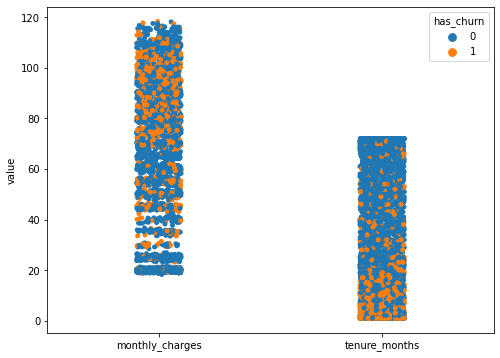

In [136]:
telco_swarm(telco_quant_melt)